# V256. Röntgenfluoreszenz

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [14]:
#Einlesen der Messdaten

Z, Ea, Eb, Ea_err, Eb_err = np.loadtxt('/home/jan/Dokumente/SS 2018/PAP 2.2/V256/Tabelle1.dat', unpack = True)

sqrt_Ea = np.sqrt(Ea)
err_sqrt_Ea = Ea_err/(2*sqrt_Ea)
sqrt_Eb = np.sqrt(Eb)
err_sqrt_Eb = Eb_err/(2*sqrt_Eb)


#Fitfunktion
def moseley1(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(3/4)

def moseley2(x, sqrt_Er, sig12):
    return sqrt_Er*(x-sig12)*np.sqrt(8/9)

popta, pcova = curve_fit(moseley1, Z, sqrt_Ea, p0 = [0.11, 1], sigma = err_sqrt_Ea)
poptb, pcovb = curve_fit(moseley2, Z, sqrt_Eb, p0 = [0.11, 1.8], sigma = err_sqrt_Eb)

ERa = popta[0]
err_ERa = np.sqrt(pcova[0,0])
sgma = popta[1]
err_sgma = np.sqrt(pcova[1,1])

ERb = poptb[0]
err_ERb = np.sqrt(pcovb[0,0])
sgmb = poptb[1]
err_sgmb = np.sqrt(pcovb[1,1])

x = np.array([0,50])

E_R = (119.02013 ± 0.40220) eV
σ_12 = (1.472  ± 0.121)
χ² = 0.62
χ²_red = 0.10
Fitwahrscheinlichkeit: 100.0 %


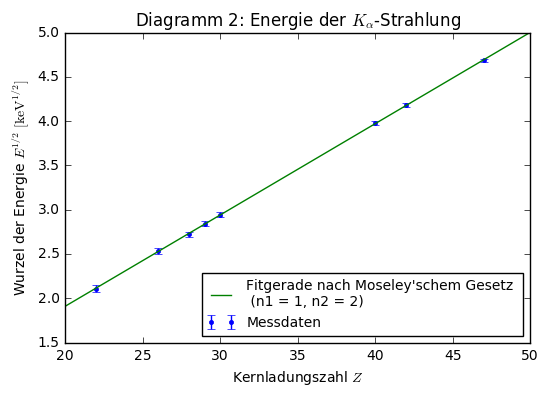

In [15]:
#Plot Kα

plt.title('Diagramm 2: Energie der $K_{\\alpha}$-Strahlung')
plt.errorbar(Z, sqrt_Ea, yerr = err_sqrt_Ea, fmt = '.', linestyle = 'none', label = 'Messdaten')
plt.plot(x, moseley1(x, *popta), label = 'Fitgerade nach Moseley\'schem Gesetz \n (n1 = 1, n2 = 2)')
plt.xlabel('Kernladungszahl $Z$')
plt.ylabel('Wurzel der Energie $E^{1/2}\ [\mathrm{keV^{1/2}}]$')
plt.xlim(20,50)
plt.ylim(1.5,5)
plt.legend(loc = 'lower right', prop = {'size': 10})
plt.savefig('V256_Diagr.8.jpeg', format = 'jpeg', dpi = 500)

#Güte des Fits und Fitwahrscheinlichkeit

χ2_a = np.sum(((moseley1(Z, *popta) - sqrt_Ea)/err_sqrt_Ea)**2)
dof_a = 6
χ2_red_a = χ2_a/dof_a

prob_a = round(1-chi2.cdf(χ2_a, dof_a), 2)*100

#Ausgabe der Parameter

print('E_R = ({:.5f} ± {:.5f}) eV' .format(ERa*10**3, err_ERa*10**3))
print('σ_12 = ({:.3f}  ± {:.3f})' .format(sgma, err_sgma))
print('χ² = {:.2f}'.format(χ2_a))
print('χ²_red = {:.2f}' .format(χ2_red_a))
print('Fitwahrscheinlichkeit:', prob_a, '%')

E_R = (116.77615 ± 0.47723) eV
σ_12 = (1.879  ± 0.153)
χ² = 1.51
χ²_red = 0.25
Fitwahrscheinlichkeit: 96.0 %


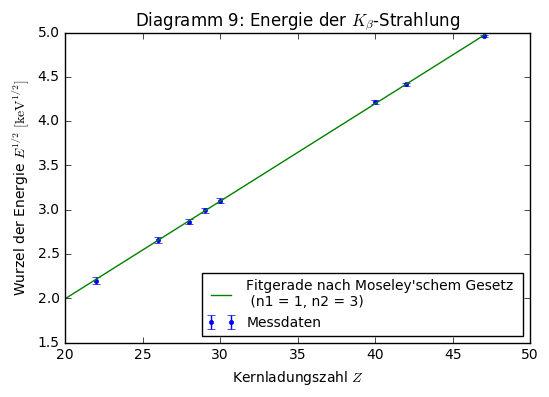

In [16]:
#Plot Kβ

plt.title('Diagramm 9: Energie der $K_{\\beta}$-Strahlung')
plt.errorbar(Z, sqrt_Eb, yerr = err_sqrt_Eb, fmt = '.', linestyle = 'none', label = 'Messdaten')
plt.plot(x, moseley2(x, *poptb), label = 'Fitgerade nach Moseley\'schem Gesetz \n (n1 = 1, n2 = 3)')
plt.xlabel('Kernladungszahl $Z$')
plt.ylabel('Wurzel der Energie $E^{1/2}\ [\mathrm{keV^{1/2}}]$')
plt.xlim(20,50)
plt.ylim(1.5,5)
plt.legend(loc = 'lower right', prop = {'size': 10})
plt.savefig('V256_Diagr.9.jpeg', format = 'jpeg', dpi = 500)


#Güte des Fits und Fitwahrscheinlichkeit

χ2_b = np.sum(((moseley2(Z, *poptb) - sqrt_Eb)/err_sqrt_Eb)**2)
dof_b = 6
χ2_red_b = χ2_b/dof_b

prob_b = round(1-chi2.cdf(χ2_b, dof_b), 2)*100

#Ausgabe der Parameter

print('E_R = ({:.5f} ± {:.5f}) eV' .format(ERb*10**3, err_ERb*10**3))
print('σ_12 = ({:.3f}  ± {:.3f})' .format(sgmb, err_sgmb))
print('χ² = {:.2f}'.format(χ2_b))
print('χ²_red = {:.2f}' .format(χ2_red_b))
print('Fitwahrscheinlichkeit:', prob_b, '%')